___
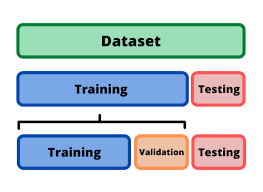


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2025
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Train Test Split</font>

**¿Qué es?**

Es una técnica para evaluar el performance de un modelo de machine learning. 

Puede ser usado para problemas de clasificación y regresión y puede ser usado para cualquier algoritmo de aprendizaje supervisado. 

*Train set:* Datos utilizados para construir, ajustar y aprender parámetros del modelo. El modelo “ve” estos datos.

*Test set:* datos mantenidos ocultos durante el entrenamiento. Se utiliza para medir qué tan bien se generaliza el modelo a datos invisibles. Esto simula predicciones del mundo real y revela un posible sobreajuste.

*Validation Set:* Se utiliza para ajustar los hiperparámetros y seleccionar el mejor modelo, especialmente al construir pipelines complejos.


**¿Porqué?**

La idea es ajustar un modelo en datos disponibles con entradas y salidas conocidas y luego hacer predicciones sobre nuevos datos futuros donde no tengamos la salida esperada o los valores objetivo. 

**¿Cuándo funciona?**

Cuando tenemos suficientes datos disponibles. El procedimiento de train-test no funciona muy bien cuando los datos disponibles son pocos. 

La razón es que cuando el conjunto de datos se divide en conjuntos de entrenamiento y de prueba, no habrá suficientes datos en el conjunto de datos de entrenamiento para que el modelo aprenda un mapeo de entradas y salidas. 
Tampoco habrá datos suficientes en el conjunto de prueba (test) para evaluar el rendimiento del modelo

**¿Qué hacer si se tienen datos insuficientes?**

Una alternativa es el procedimiento de *K-fold cross-validation*


**Entonces...¿cuándo uso el train-test split?**

- Cuando nuestra base de datos es muy grande y con un solo split podemos representar la distribución general de los datos.
- Cuando no necesitas tunear hiperparámetros por el momento
- Si estás analizando ideas de modelos

#### <font color= #2E9AFE> Configuración</font>

Parámetro principal de configuración: tamaño de entrenamiento y prueba (porcentaje).

Tristemente... no hay una división óptima :( 

Separaciones más comunes:
- Entrenamiento: 80%, Prueba 20%
- Entrenamiento: 70%, Prueba 30%

In [ ]:
#pip install ucimlrepo

In [ ]:
#Librerías
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

#### <font color= blue> Ejemplo de train test split para problema de CLASIFICACION</font>

#### <font color= #2E9AFE> Divisiones estratificadas</font>


La mayoría de los problemas de clasificación no tienen un número balanceado de datos para cada etiqueta de clase. 
Por lo tanto es deseable dividir los datos en conjunto de entrenamiento y prueba de tal manera que se conserven las mismas proporciones de datos en cada clase observada en el conjunto de datos original. 

Para eso podemos usar la división estratificada de los datos de entrenamiento y prueba

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
glass_identification = fetch_ucirepo(id=42) 
  
X = glass_identification.data.features 
y = glass_identification.data.targets 
  
glass_data = pd.concat([X,y], axis=1)
glass_data.head()

In [ ]:
#Cuántas clases tengo en mi variable a predecir Y (tipo de vidrio)

fig = px.pie(
    glass_data,
    names="Type_of_glass",
    title="Distribucion de la variable a predecir"
)

fig.show()

In [ ]:
#dividir entre train y test
 = train_test_split(X, y, test_size=0.3, random_state=46, =)

In [ ]:
#Cuántas clases tengo en mi variable a predecir Y de entrenamiento(tipo de vidrio)


**Recordemos** todas las transformaciones solo deben realizarse en el conjunto de entrenamiento para evitar el data leakage.

In [ ]:
#Escalamos los datos sólo a los datos de entrada (X)


In [ ]:
#Ajustar regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#crear un objeto de regresión logística

#Ajustamos modelo con datos de entrenamiento

#predicciones con datos de prueba -> y^


#Evaluamos predicciones contra datos reales

print('Accuracy del test: %3f' %accuracy)


Un tip para saber si el modelo está sobre ajustando, es también ver las métricas del train

No debe de haber demasiada diferencia entre las métricas del train y del test.

Si hay mucha diferencia, quiere decir que el modelo está sobreajustando (overfitting)

In [ ]:
#algo que siempre es bueno ver también, son las métricas del train


#### <font color= blue> Ejemplo de train test split para problema de Regresion</font>

In [ ]:
from sklearn import datasets
housing = datasets.fetch_california_housing()
df_housing = pd.DataFrame(housing.data,columns=housing.feature_names)
df_housing['target'] = pd.Series(housing.target)
df_housing.head()

In [ ]:
#dividimos las X de las Y
X = df_housing.iloc[:, :-1]
y = df_housing.iloc[:, -1]

In [ ]:
#divido datos en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#Escalamos los datos sólo a los datos de entrada (X)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform (X_test)

In [ ]:
#si quisiera hacer una seleccion de variables, tambien seria despues de dividir los datos en entrenamiento y prueba
from sklearn.feature_selection import SelectKBest, f_regression


print("Variables significantes:", X.columns[significant].tolist())

In [ ]:
#Ajustar regresión lineal
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

#creamos el objeto de regresión lineal
model = LinearRegression()
#ajustamos el modelo con datos de entrenamiento
model.fit(X_train_scaled, y_train)
#creamos predicciones --> y^
pred = model.predict(X_test_scaled)

#Evaluamos predicciones contra datos reales
mae = mean_absolute_error(y_test, pred)
print('MAE: %.3f' %mae)

In [ ]:
#algo que siempre es bueno ver también, son las métricas del train

## ¿Cuál es la desventaja de usar el procedimiento de test/train split para evaluar el modelo?

Los resultados del modelo pueden variar mucho dependiendo de dónde se hizo la partición del entrenamiento y la prueba

**Ejemplo**

In [ ]:
#cargar librerías
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
#cargar datos
iris = load_iris()
#separar X y Y
X=iris.data
y=iris.target

In [ ]:
#Hacer el train/test split con diferentes valores aleatorios
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7) #2 #7

#Revisar el accuracy (precisión) de clasificación del KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

**Cómo se soluciona esto???** 

**Respuesta:** usamos cross validation!


### <font color= #2E9AFE> Cross Validation</font>

El cross validation repite este procedimiento de dividir los datos en entrenamiento y prueba muchas veces para promediar los resultados de todos las particiones y obtener un modelo más generalizado. 

**Recomendaciones**

- Con un dataset chico (<1000 filas), se recomienda usar entre 5 y 10 folds

- Con un dataset mediano (1000 - 10,000 filas), se recomienda usar 5 folds

- Con un dataset grande (>10,000 filas), se recomienda usar entre 3 y 5 folds

- Con datasets demasiado grandes se recomienda usar mejor train/test split




#### <font color= blue> Ejemplo de K-fold cross validation para problema de Regresion</font>

In [ ]:
#prediccion del precio de una casa
X_house = df_housing.iloc[:, :-1]
y_house = df_housing.iloc[:, -1]
df_housing.head()

In [ ]:
df_housing.shape

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# KFold para regresion
kf = KFold(n_splits=, shuffle=True, random_state=42)

# Definimos modelos a probar
regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42)
}

# Evaluamos cada modelo de regresion
for name, model in regression_models.items():
    #creamos un pipeline donde estandarizamos los datos de entrenamiento y luego aplicamos el modelo
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X_house, y_house, cv=kf, scoring='r2')
    print(f"{name}:")
    print(f"  R² scores: {scores}")
    print(f"  Mean R²: {scores.mean():.4f}\n")

#### <font color= blue> Ejemplo de K-fold cross validation para problema de Clasificacion </font>

La mayoría de los problemas de clasificación no tienen un número balanceado de datos para cada etiqueta de clase. 
Existe una variación en el cross validation donde también podemos hacer una división estratificada de nuestra variable a predecir en cada fold. 


In [ ]:
# Datos de cáncer
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X_cancer = pd.DataFrame(data.data, columns=data.feature_names)
y_cancer = pd.Series(data.target)
cancer = pd.concat([X_cancer,y_cancer], axis=1)
cancer.head()

In [ ]:
cancer.shape

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# inicializamos el objeto de cross validation estratificado
skf = StratifiedKFold(n_splits=, shuffle=True, random_state=42)

# Definimos los modelos a probar
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Evaluamos cada modelo
for name, model in classification_models.items():
    #creamos un pipeline donde estandarizamos los datos de entrenamiento y luego aplicamos el modelo
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X_cancer, y_cancer, cv=skf, scoring='accuracy')
    print(f"{name}:")
    print(f"  Accuracy scores: {scores}")
    print(f"  Mean accuracy: {scores.mean():.4f}\n")

### Curvas de aprendizaje

Las curvas de aprendizaje muestran cómo el error del modelo varía con el tamaño del conjunto de entrenamiento. Son útiles para identificar si el modelo sufre de underfitting o overfitting.

- Underfitting: Tanto el error de entrenamiento como el de validación son altos.
- Overfitting: El error de entrenamiento es bajo, pero el error de validación es alto.
- Balanceado: Ambos errores son bajos y cercanos.

In [ ]:
from sklearn.model_selection import learning_curve

# curva de aprendizaje
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', )
])

train_sizes, train_scores, val_scores = learning_curve(
    estimator=pipeline,
    X=X_cancer,
    y=y_cancer,
    cv=skf,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.title('Learning Curve: Logistic Regression (Breast Cancer Dataset)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusion**

La regresion logistica parece ser el mejor modelo para los datos de cancer de mama ya que no hace overfitting. Al contrario del random forest que sí se sobre ajusta. 


### Referencias

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html